**LAB 4.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/1QRMe4rVPRhsplAPssH1pa7Msf7sOMNv2?usp=sharing

# **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [11]:
data_dir = "Dataset-Lab 4/"

In [12]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Loading the data
data0 = pd.read_csv(data_dir + 'data.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [14]:
#Check shape
data0.shape

(10000, 18)

In [15]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [16]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

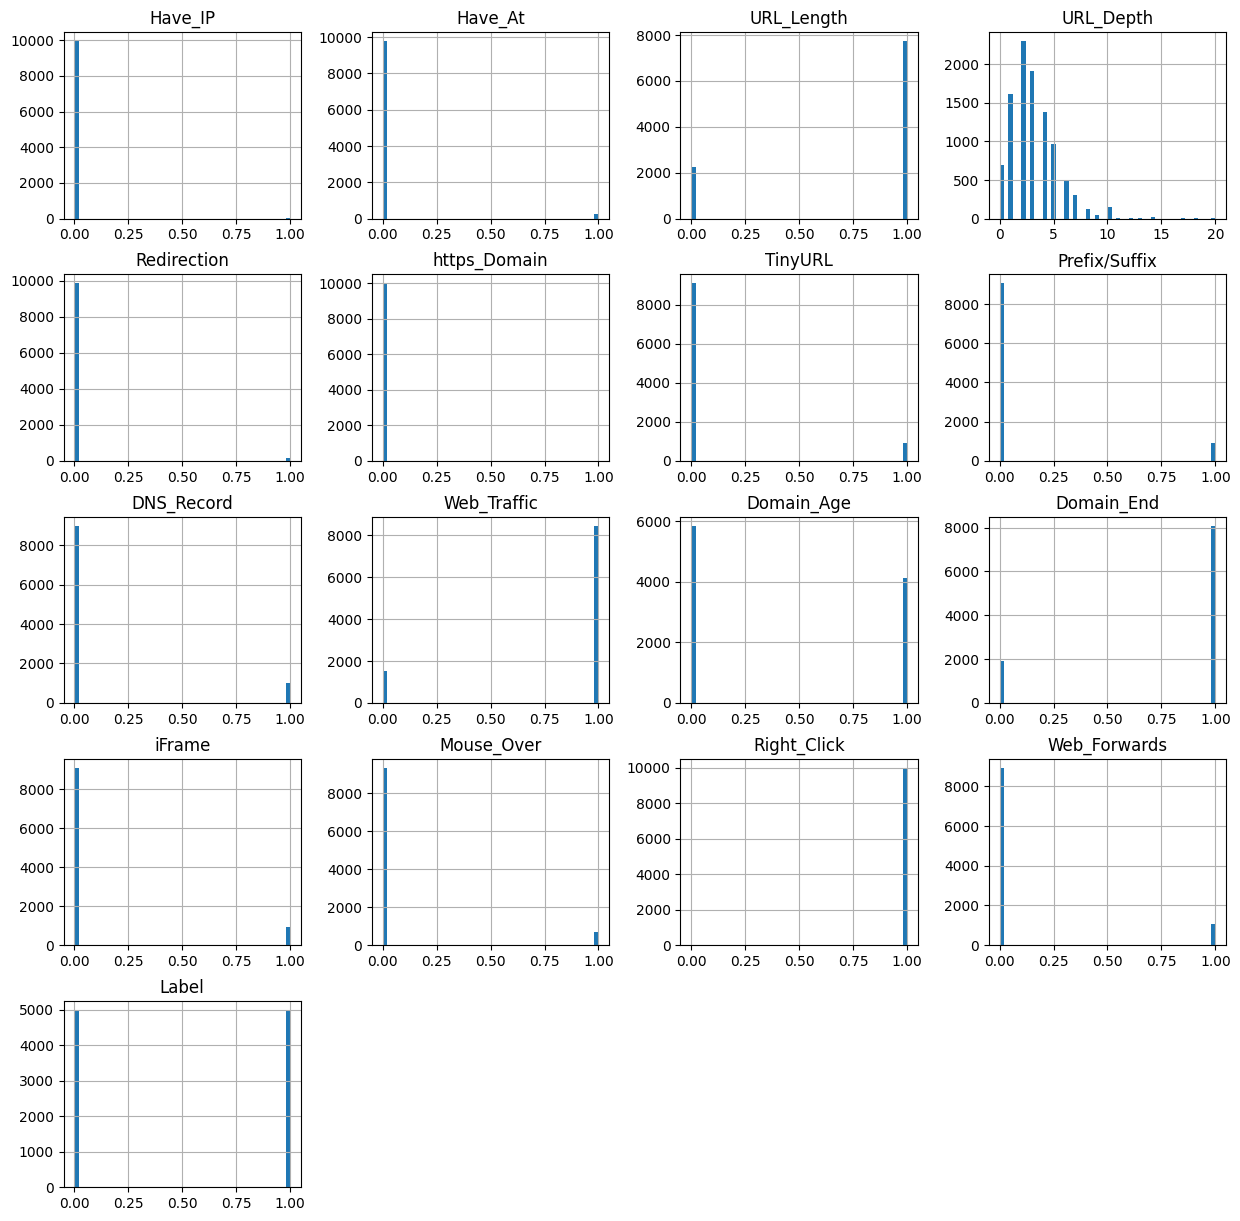

In [17]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

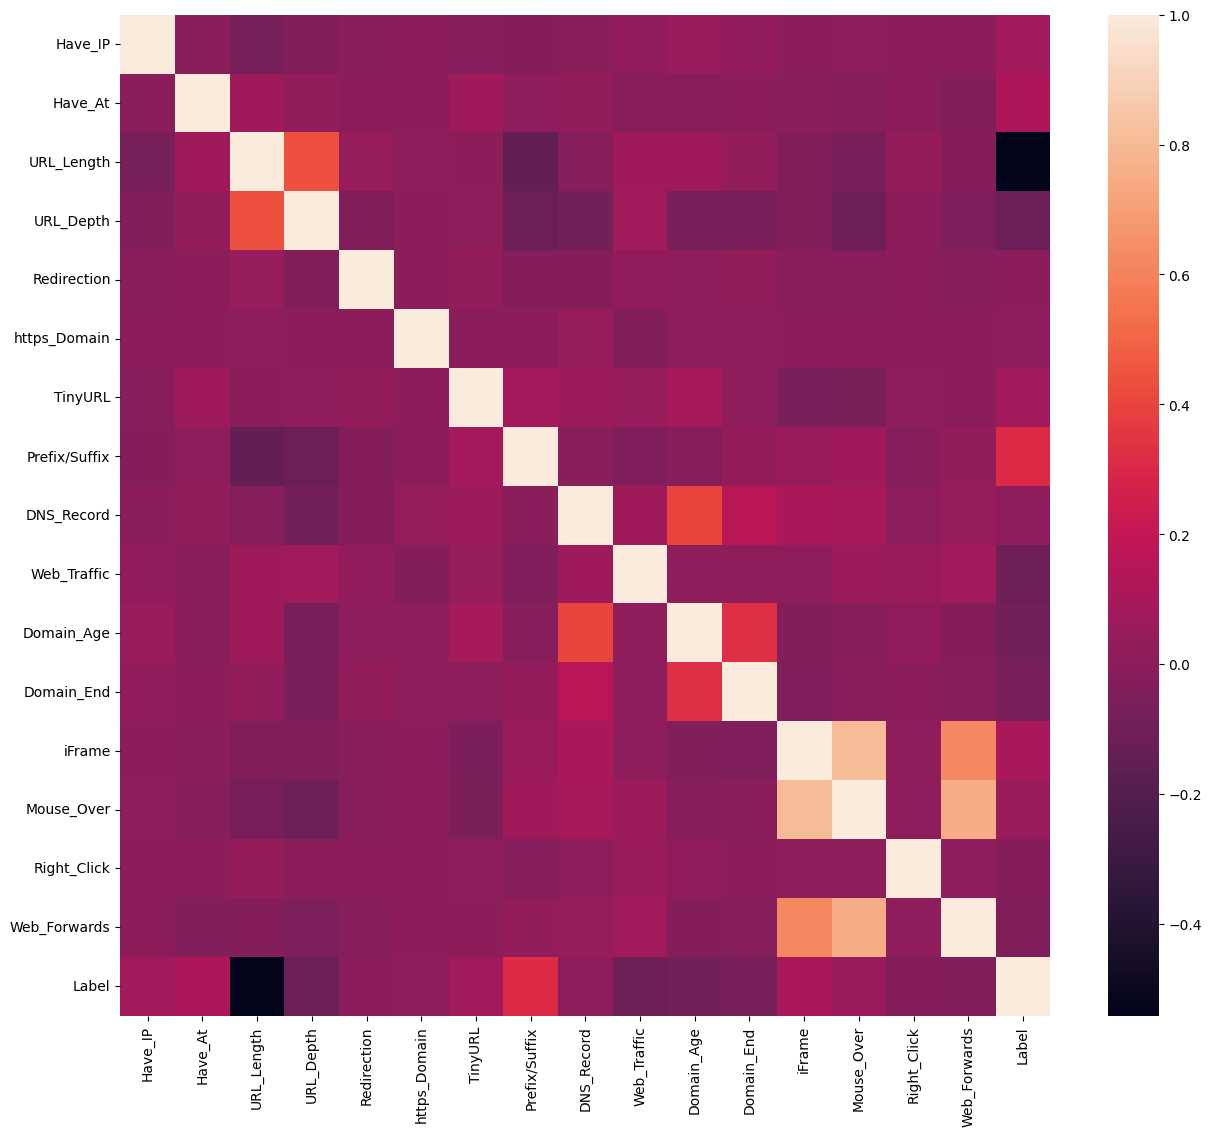

In [18]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.drop('Domain', axis=1).corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [19]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [20]:
#Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [21]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [22]:
# Normalize URL_Depth
data['URL_Depth'] = (data['URL_Depth'] - data['URL_Depth'].min()) / (data['URL_Depth'].max() - data['URL_Depth'].min())

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [23]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0.15,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,1,0.15,0,0,0,0,0,1,1,1,0,0,1,0,1
2,0,0,0,0.10,0,0,0,0,0,1,1,1,0,0,1,0,1
3,0,0,1,0.20,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0.15,0,0,0,0,0,1,1,1,0,0,1,0,1


# **6. Chia dữ liệu**

In [24]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [25]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy/học sâu**
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Long Short-Term Memory (LSTM) network
* Support Vector Machines

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Creating model results
Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [28]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [30]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.816


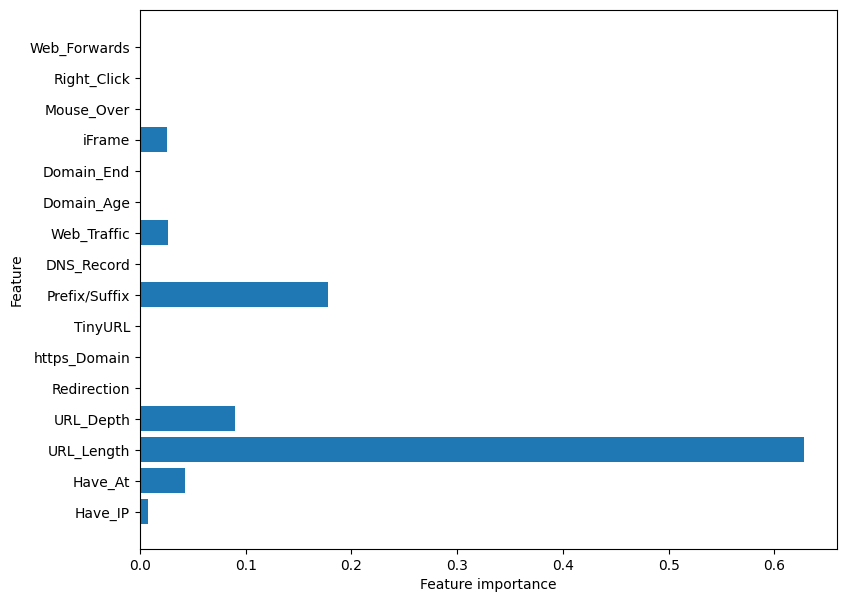

In [31]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [32]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [33]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [34]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [35]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.812
Random forest: Accuracy on test Data: 0.806


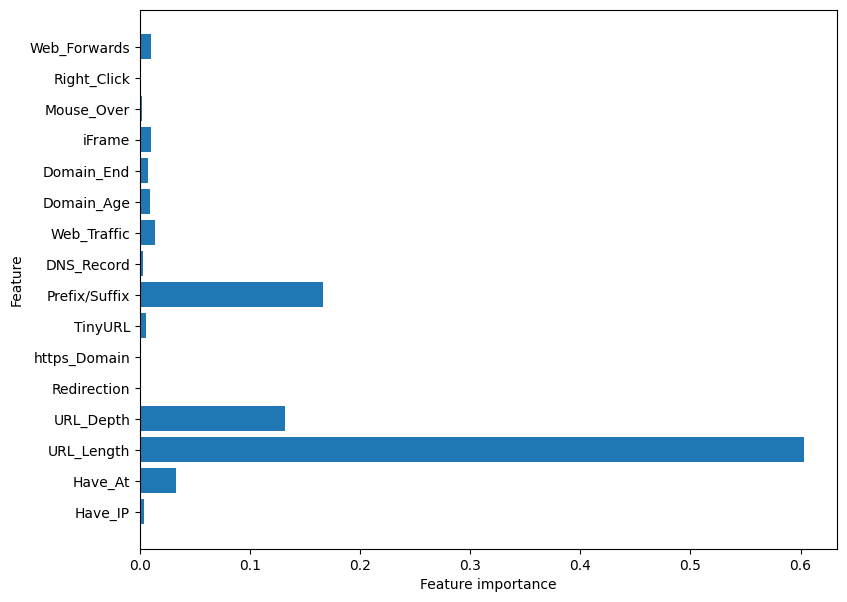

In [36]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [37]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## 7.3. Multilayer Perceptrons (MLPs) - Học sâu

In [38]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [39]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [40]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.858
Multilayer Perceptrons: Accuracy on test Data: 0.852


**Lưu trữ kết quả**

In [41]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [42]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [43]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [44]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.866


**Lưu trữ kết quả**

In [45]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Long Short-Term Memory (LSTM) network**
***Bài tập số 1: Hoàn thành huấn luyện mô hình LSTM.***

In [46]:
# Import necessary libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

2025-04-22 15:42:57.839923: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 15:42:57.843851: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 15:42:57.855132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745336577.873900    2050 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745336577.880160    2050 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745336577.900773    2050 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [47]:
# Reshape data for LSTM [samples, time steps, features]
# We treat each sample as one time step with n_features
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

print(X_train_lstm.shape)
print(X_test_lstm.shape)

(8000, 1, 16)
(2000, 1, 16)


In [48]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(1, X_train.shape[1]), activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.summary()

2025-04-22 15:42:59.674201: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/workspaces/ML-lab/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the model
# Using a small number of epochs for demonstration
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5907 - loss: 0.6785 - val_accuracy: 0.7756 - val_loss: 0.6119
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7774 - loss: 0.5735 - val_accuracy: 0.7969 - val_loss: 0.4861
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4669 - val_accuracy: 0.8025 - val_loss: 0.4454
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4333 - val_accuracy: 0.8006 - val_loss: 0.4303
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4201 - val_accuracy: 0.8006 - val_loss: 0.4262
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4080 - val_accuracy: 0.7944 - val_loss: 0.4220
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.4094 - val_accuracy: 0.7950 - val_loss: 0.4169
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8060 - loss: 0.4066 - val_accuracy: 0.8100 - val_

In [50]:
# Predicting
# Predict probabilities
y_train_prob_lstm = lstm_model.predict(X_train_lstm)
y_test_prob_lstm = lstm_model.predict(X_test_lstm)

# Convert probabilities to binary predictions (0 or 1)
y_train_lstm = (y_train_prob_lstm > 0.5).astype(int)
y_test_lstm = (y_test_prob_lstm > 0.5).astype(int)

145/250 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


**Đánh giá hiệu suất**

In [51]:
# Computing the accuracy
acc_train_lstm = accuracy_score(y_train, y_train_lstm)
acc_test_lstm = accuracy_score(y_test, y_test_lstm)

print("LSTM: Accuracy on training Data: {:.3f}".format(acc_train_lstm))
print("LSTM: Accuracy on test Data: {:.3f}".format(acc_test_lstm))

LSTM: Accuracy on training Data: 0.816
LSTM: Accuracy on test Data: 0.811


**Lưu trữ kết quả**

In [52]:
storeResults('LSTM', acc_train_lstm, acc_test_lstm)

## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyện mô hình SVM.***

In [53]:
from sklearn.svm import SVC

# Support Vector Machines model

# instantiate
svm = SVC(kernel='linear', C=1)

# fit
svm.fit(X_train, y_train)

# predicting
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# computing the accuracy
acc_train_svm = accuracy_score(y_train, y_train_svm)
acc_test_svm = accuracy_score(y_test, y_test_svm)

print("Support Vector Machines: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("Support Vector Machines: Accuracy on test Data: {:.3f}".format(acc_test_svm))

# store results
storeResults('Support Vector Machines', acc_train_svm, acc_test_svm)

Support Vector Machines: Accuracy on training Data: 0.802
Support Vector Machines: Accuracy on test Data: 0.803


# **8. So sánh các mô hình**

In [54]:
results = pd.DataFrame({ 'Model': Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.813,0.816
1,Random Forest,0.812,0.806
2,Multilayer Perceptrons,0.858,0.852
3,XGBoost,0.866,0.866
4,LSTM,0.816,0.811
5,Support Vector Machines,0.802,0.803


In [55]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,Model,Train Accuracy,Test Accuracy
3,XGBoost,0.866,0.866
2,Multilayer Perceptrons,0.858,0.852
0,Decision Tree,0.813,0.816
4,LSTM,0.816,0.811
1,Random Forest,0.812,0.806
5,Support Vector Machines,0.802,0.803


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

In [56]:
results = pd.DataFrame({ 'Model': Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.813,0.816
1,Random Forest,0.812,0.806
2,Multilayer Perceptrons,0.858,0.852
3,XGBoost,0.866,0.866
4,LSTM,0.816,0.811
5,Support Vector Machines,0.802,0.803


In [57]:
import joblib

# Tạo từ điển ánh xạ tên mô hình với đối tượng mô hình
model_mapping = {
    'Decision Tree': tree,
    'Random Forest': forest,
    'Multilayer Perceptrons': mlp,
    'XGBoost': xgb,
    'Support Vector Machines': svm
}

# Sắp xếp kết quả theo độ chính xác
sorted_results = results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
print("Kết quả so sánh các mô hình:")
print(sorted_results)

# Lấy tên mô hình có độ chính xác cao nhất
best_model_name = sorted_results.iloc[0]['Model']
print(f"\nMô hình có độ chính xác cao nhất: {best_model_name}")

# Lưu trữ mô hình tốt nhất
for model_name, model_object in model_mapping.items():
    if model_name == best_model_name:
        joblib.dump(model_object, f'best_model_{model_name.lower().replace(" ", "_")}.pkl')
        print(f"Mô hình {model_name} đã được lưu trữ thành công.")
        break

Kết quả so sánh các mô hình:
                     Model  Train Accuracy  Test Accuracy
3                  XGBoost           0.866          0.866
2   Multilayer Perceptrons           0.858          0.852
0            Decision Tree           0.813          0.816
4                     LSTM           0.816          0.811
1            Random Forest           0.812          0.806
5  Support Vector Machines           0.802          0.803

Mô hình có độ chính xác cao nhất: XGBoost
Mô hình XGBoost đã được lưu trữ thành công.


# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 4.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hớp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv'

## **1.1. Phishing URLs:**

In [15]:
import pandas as pd

In [16]:
#Load CSV
data0 = pd.read_csv(data_dir + "verified_online.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,9066671,https://safe-geode-reminder.glitch.me/public/n...,http://www.phishtank.com/phish_detail.php?phis...,2025-04-18T08:07:24+00:00,yes,2025-04-18T08:11:45+00:00,yes,Other
1,9066670,https://rounded-efficient-ringer.glitch.me/pub...,http://www.phishtank.com/phish_detail.php?phis...,2025-04-18T08:07:06+00:00,yes,2025-04-18T08:11:45+00:00,yes,Other
2,9066669,https://guttural-sudden-peanut.glitch.me/publi...,http://www.phishtank.com/phish_detail.php?phis...,2025-04-18T08:06:48+00:00,yes,2025-04-18T08:11:45+00:00,yes,Other
3,9066668,https://elegant-descriptive-receipt.glitch.me/...,http://www.phishtank.com/phish_detail.php?phis...,2025-04-18T08:06:29+00:00,yes,2025-04-18T08:11:45+00:00,yes,Other
4,9066667,https://eggplant-right-gruyere.glitch.me/publi...,http://www.phishtank.com/phish_detail.php?phis...,2025-04-18T08:06:06+00:00,yes,2025-04-18T08:11:45+00:00,yes,Other


In [17]:
data0.shape

(63648, 8)



Chọn ngẫu nhiên 10000 mẫu.

In [18]:
phishurl = data0.sample(n = 10000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8790063,https://qrco.de/bfRN0D,http://www.phishtank.com/phish_detail.php?phis...,2024-10-01T15:47:07+00:00,yes,2024-10-01T16:09:52+00:00,yes,Other
1,8547971,https://webmail.sfr.quo.temporary.site/,http://www.phishtank.com/phish_detail.php?phis...,2024-04-23T13:52:13+00:00,yes,2024-04-23T14:04:05+00:00,yes,Other
2,8667187,https://odunlar.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-07-20T19:10:41+00:00,yes,2024-07-20T19:13:24+00:00,yes,Other
3,8793581,https://q-r.to/bfS9Vr,http://www.phishtank.com/phish_detail.php?phis...,2024-10-04T18:06:09+00:00,yes,2024-10-04T18:13:15+00:00,yes,Other
4,8673449,https://bit.ly/4bWzj7e,http://www.phishtank.com/phish_detail.php?phis...,2024-07-23T23:08:53+00:00,yes,2024-07-23T23:13:13+00:00,yes,Other


In [19]:
phishurl.shape

(10000, 8)

## **1.2. Legitimate URLs:**

In [20]:
#Load legitimate files
data1 = pd.read_csv(data_dir + "List_Benign_URL.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [21]:
#Collec 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 10000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [22]:
legiurl.shape

(10000, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar
* Domain
* HTML & Javascript

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [17]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [18]:
# 1.Domain
def getDomain(url):
	domain = urlparse(url).netloc
	if re.match(r"^www.",domain):
		domain = domain.replace("www.","")
	return domain

In [19]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [20]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [21]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [22]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [23]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [24]:
# 7. https_Domain
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [25]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [26]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [27]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime
from urllib.error import URLError
from socket import gaierror, timeout as SocketTimeoutError

In [28]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic
def web_traffic(url):
  rank = 1 # Default to 1 (phishing/unknown)
  try:
    #Fill whitespaces URL if any
    url = urllib.parse.quote(url)
    # The data.alexa.com service is retired. This request will likely fail.
    # Added timeout=5 seconds
    response = urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url, timeout=5).read()
    soup = BeautifulSoup(response, "xml")
    reach_tag = soup.find("REACH")
    # Check if tag and RANK attribute exist
    if reach_tag and 'RANK' in reach_tag.attrs:
        rank_str = reach_tag['RANK']
        rank_val = int(rank_str)
        # Assign 0 only if rank is >= 100000
        if rank_val >= 100000:
            rank = 0
    # Otherwise, rank remains 1 (default)
  except (URLError, gaierror, SocketTimeoutError, ConnectionResetError, TypeError, ValueError):
    # Catch specific network/DNS/timeout errors, parsing errors, or type errors
    # Return 1 (indicating potential phishing or unknown traffic) if data unavailable or error occurs
    rank = 1
  except Exception as e:
    # Catch any other unexpected error during parsing, default to 1
    # print(f"Unexpected error in web_traffic for {url}: {e}") # Optional: log other errors
    rank = 1
  return rank

In [29]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [30]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    # Make sure both dates are timezone-naive
    if hasattr(expiration_date, 'tzinfo') and expiration_date.tzinfo is not None:
        # Convert to timezone-naive by replacing tzinfo with None
        expiration_date = expiration_date.replace(tzinfo=None)
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [31]:
import requests

In [32]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [33]:
# 16.Check Mouse_Over
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [34]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [35]:
# 18.Check Web_Forwards
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [36]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain features (4)
  dns = 0
  domain_name = None # Initialize domain_name
  try:
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc
    # Ensure there's a network location before calling whois
    if netloc:
        # Basic check to avoid calling whois on things that are clearly not domains
        if '.' in netloc and not netloc.replace('.', '').isdigit(): # Avoid IP addresses
             # Note: The whois library might log its own network errors (timeouts, DNS issues)
             # even if we catch the exceptions here.
             domain_name = whois.whois(netloc)
        else:
             dns = 1 # Treat IPs or invalid netlocs as having no valid DNS/whois
    else:
        # Handle cases where urlparse fails to find a domain (e.g., relative paths, malformed URLs)
        dns = 1
    # Check if whois returned None or an empty result (common for some TLDs or if lookup failed silently)
    if domain_name is None or not getattr(domain_name, 'creation_date', None):
        dns = 1

  except (whois.parser.PywhoisError, # Library specific parsing errors
          gaierror,                 # DNS lookup errors (e.g., getaddrinfo failed)
          SocketTimeoutError,       # Socket level timeouts
          TimeoutError,             # General timeout errors
          ConnectionRefusedError,   # Connection refused by server
          ConnectionResetError,     # Connection reset by peer
          UnicodeDecodeError,       # Errors decoding WHOIS response
          TypeError,                # Unexpected data types from whois
          AttributeError) as e:     # Missing attributes in whois response
    # Catch specific errors related to whois lookup, DNS, timeouts, connection issues, parsing, or unexpected data types/attributes
    # print(f"WHOIS lookup error for {netloc}: {type(e).__name__} - {e}") # Optional: log the caught error
    dns = 1
  except Exception as e:
    # Catch any other unexpected error during WHOIS
    # print(f"Unexpected error during WHOIS lookup for {url}: {e}") # Optional: log other errors
    dns = 1


  features.append(dns)
  features.append(web_traffic(url)) # Call the refined web_traffic
  # Ensure domain_name is valid before passing to domainAge/domainEnd
  features.append(1 if dns == 1 or domain_name is None else domainAge(domain_name))
  features.append(1 if dns == 1 or domain_name is None else domainEnd(domain_name))

  # HTML & Javascript features (4)
  response = "" # Initialize response
  try:
    # Added timeout and headers to mimic a browser slightly more
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    # Allow redirects, but maybe add max redirects later if needed
    response = requests.get(url, timeout=5, headers=headers, allow_redirects=True)
    response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
  except (requests.exceptions.RequestException, requests.exceptions.Timeout, requests.exceptions.ConnectionError, requests.exceptions.HTTPError, requests.exceptions.TooManyRedirects) as e:
    # Catch common requests errors including too many redirects
    # print(f"Error fetching HTML for {url}: {e}") # Optional logging
    response = "" # Ensure response is empty on error
  except Exception as e:
    # Catch any other unexpected error
    # print(f"Unexpected error fetching HTML for {url}: {e}") # Optional logging
    response = ""

  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)

  return features

In [37]:
from tqdm.notebook import tqdm
import multiprocessing as mp
from functools import partial

In [38]:
# Function to extract features for a batch of URLs
def extract_batch_features(urls, label, start_idx, end_idx):
    batch_features = []
    # Create a tqdm progress bar for each batch
    for i in tqdm(range(start_idx, end_idx), desc=f'Processing batch {start_idx}-{end_idx}'):
        if i < len(urls):
            url = urls[i]
            batch_features.append(featureExtraction(url, label))
    return batch_features

# Function to parallelize feature extraction across cores
def parallel_feature_extraction(urls, label, n_cores=4):
    num_urls = len(urls)
    pool = mp.Pool(processes=n_cores)
    
    # Divide work among cores
    batch_size = num_urls // n_cores
    remainder = num_urls % n_cores
    
    print(f"Extracting features from {num_urls} URLs using {n_cores} cores...")
    print(f"Batch size: {batch_size} URLs per core")
    
    # Create batches for each core
    batch_args = []
    start_idx = 0
    
    for i in range(n_cores):
        # Add one extra item to some batches if there's a remainder
        extra = 1 if i < remainder else 0
        end_idx = start_idx + batch_size + extra
        
        batch_args.append((urls, label, start_idx, end_idx))
        start_idx = end_idx
    
    # Execute in parallel and collect results with overall progress bar
    with tqdm(total=n_cores, desc='Overall progress') as pbar:
        results = []
        for batch in pool.starmap(extract_batch_features, batch_args):
            results.append(batch)
            pbar.update(1)
    
    pool.close()
    pool.join()
    
    # Flatten the results
    all_features = []
    for batch in results:
        all_features.extend(batch)
    
    return all_features

## **3.1 URL hợp pháp**

In [76]:
legiurl.shape

(10000, 1)

In [ ]:
# Using multiprocessing for legitimate URLs feature extraction
print(f"Extracting features for legitimate URLs using {mp.cpu_count()} cores...")
label = 0
legi_features = parallel_feature_extraction(legiurl['URLs'], label, n_cores=4)

In [79]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


In [80]:
legitimate.to_csv('legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [81]:
phishurl.shape

(10000, 8)

In [39]:
temp = pd.read_csv(data_dir + "List_Phishing_URL.csv")
temp.head()

,url
0,http://www.dghjdgf.com/paypal.co.uk/cycgi-bin/...
1,http://serviciosbys.com/paypal.cgi.bin.get-int...
2,http://mail.printakid.com/www.online.americane...
3,http://thewhiskeydregs.com/wp-content/themes/w...
4,http://smilesvoegol.servebbs.org/voegol.php


In [40]:
phishy_urls = temp.sample(n = 10000, random_state = 12).copy()
phishy_urls = phishy_urls.reset_index(drop=True)
phishy_urls.head()

,url
0,http://masyaget.com/wed.php
1,http://mslogistic.eu/agreement.php
2,http://caribbeachresort.com/7fg3g
3,http://barbarahallsonoma.com/newlisting/remax/
4,http://wumt.westernunion.com.cuc.edu.mx/Step0.php


In [41]:
# Using multiprocessing for phishing URLs feature extraction
print(f"Extracting features for phishing URLs using {mp.cpu_count()} cores...")
label = 1
phish_features = parallel_feature_extraction(phishy_urls['url'], label, n_cores=4)

Extracting features for phishing URLs using 4 cores...
Extracting features from 10000 URLs using 4 cores...
Batch size: 2500 URLs per core
Extracting features from 10000 URLs using 4 cores...
Batch size: 2500 URLs per core


Overall progress:   0%|          | 0/4 [00:00<?, ?it/s]

2025-04-22 03:36:52,303 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2025-04-22 03:37:25,810 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
2025-04-22 03:37:25,810 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
2025-04-22 03:38:24,124 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2025-04-22 03:38:24,124 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
2025-04-22 03:38:37,711 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
2025-04-22 03:38:37,711 - whois.whois - ERROR - Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
2025-04-22 03:38:41,022 - whois.whois - E

In [42]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,masyaget.com,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1
1,mslogistic.eu,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1
2,caribbeachresort.com,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1
3,barbarahallsonoma.com,0,0,0,2,0,0,0,0,1,1,1,1,1,1,1,1,1
4,wumt.westernunion.com.cuc.edu.mx,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1


In [43]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [6]:
import pandas as pd
legitimate = pd.read_csv('./Dataset-Lab 4/legitimate.csv')
phishing = pd.read_csv('./Dataset-Lab 4/phishing.csv')

In [7]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


In [8]:
urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
19995,masterey.com,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,1
19996,sdsaibo.com,0,0,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1
19997,funground.com.ua,0,0,0,3,0,0,0,0,1,1,1,1,1,1,1,1,1
19998,mprmoldes.com,0,0,0,2,0,0,0,0,0,1,0,1,1,1,1,1,1
19999,entretecno.cl,0,0,1,4,0,0,0,0,1,1,1,1,1,1,1,1,1


In [9]:
urldata.shape

(20000, 18)

In [10]:
urldata.to_csv('preprocessed_data.csv', index=False)

Ta trích xuất được 18 thuộc tính với 20,000 rows trong đó có  10000 phishing  & 10000 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 4.2, chọn một tập dataset khác thực hiện lại Lab 4.1***

# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites